WarpAffine

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


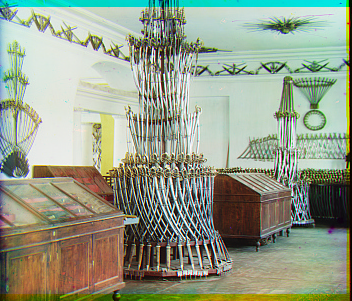

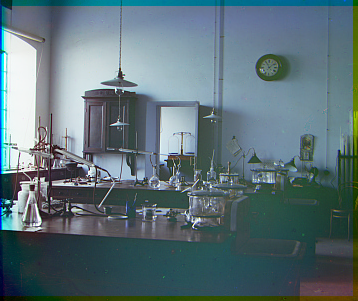

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
%matplotlib inline
methods = ['SSD','SAD']
def SSD(a,b):
  return np.sum((a[:,:]-b[:,:])**2)
def SAD(a,b):
  return np.sum(abs(a[:,:]-b[:,:]))
def NCC(a,b):
  return sum(a*b) / np.sqrt(sum(a**2)*sum(b**2))  
def applyalign(b,g):
  ssdvalues = dict()
  sadvalues = dict()
  nccvalues = dict()
  rows,cols  = b.shape
# caluculating ssd sad ncc for b,g
  for i in range(-20,20):
    for j in range(-20,20):
      M = np.float32([[1,0,i],[0,1,j]])
      dst = cv2.warpAffine(b,M,(cols,rows))
      temp = str(i)+','+str(j)
      ssdvalues[temp] = SSD(dst,g)
      sadvalues[temp] = SAD(dst,g)
      nccvalues[temp] = NCC(dst,g)
#ssd
  ssd = min(ssdvalues.values())
  for point, val in ssdvalues.items():   
      if val == ssd:
        ssdoffset = eval(point)
  M = np.float32([[1,0,ssdoffset[0]],[0,1,ssdoffset[1]]])
  newb1 = cv2.warpAffine(b,M,(cols,rows))
#sad
  sad = min(sadvalues.values())
  for point, val in sadvalues.items():   
      if val == sad:
        sadoffset = eval(point)
  M = np.float32([[1,0,sadoffset[0]],[0,1,sadoffset[1]]])
  newb2 = cv2.warpAffine(b,M,(cols,rows))
#ncc
  '''  ncc = min(nccvalues.values())
    for point, val in nccvalues.items():   
        if val == ncc:
          nccoffset = eval(point)
    M = np.float32([[1,0,nccoffset[0]],[0,1,nccoffset[1]]])
    newb3 = cv2.warpAffine(b,M,(cols,rows))
  '''
  return newb1

images = ['/content/s3.jpg','/content/s2.jpg']#,'/content/s3.jpg','/content/s4.jpg','/content/s5.jpg']
for path in images:
  img = cv2.imread(path)
  height,width,channels = img.shape[0],img.shape[1],img.shape[2]
  imgh = int(height/3)
  imgw = width
  border  = 20
  b = img[:imgh,:width,0]
  g = img[imgh:2*imgh,:width,1]
  r = img[2*imgh:height,:width,2]
  b = b[border:imgh-border,border:width-border]
  g = g[border:imgh-border,border:width-border]
  r = r[border:imgh-border,border:width-border]
  # bluegreen 
  newb = applyalign(b,g)

  #redgreen 
  newr = applyalign(r,g)

  res = cv2.merge([newb,g,newr])
  cv2_imshow(res)

In [18]:
a = (1,2,-2,4,2,3,1,0)
b = (2,3,-2,3,2,4,1,-1)
sum(a*b) / sqrt(sum(a**2)*sum(b**2)) #equal 0.947


TypeError: ignored

Assignment code

In [0]:
methods = ['cv2.TM_CCOEFF','cv2.TM_CCOEFF_NORMED','cv2.TM_CCORR','cv2.TM_CCORR_NORMED','cv2.TM_SQDIFF','cv2.TM_SQDIFF_NORMED']